# Library Management System
## Programming, Algorithms, and Data Structures Final Project

**Student Number:** 152900  
**Date:** 20/12-2024  

This notebook contains the code of the implementation of a Library Management System.  
The project is designed to address a practical application domain, incorporating object-oriented programming, algorithm analysis, and data handling, aligned with the course learning objectives.


In [1]:
#Importing needed libraries 

import csv  #For saving and loading data to/from files
import matplotlib.pyplot as plt  
from datetime import datetime 
import time
import random


## Classes Overview
I’ll use classes to structure the system. This makes it easier to organize the data and the operations related to:
1. **Books**: Storing details about the books available in the library.
2. **Users**: Tracking registered users and their borrowed books.
3. **LibraryManager**: The central hub to manage everything, from adding books to borrowing and returning them.


In [2]:
#Defining the Book class
class Book:
    def __init__(self, title, author, isbn, copies):
        """
        Initialize a book with its title, author, ISBN, and number of copies available.
        """
        self.title = title
        self.author = author
        self.isbn = isbn
        self.copies = copies

    def __str__(self):
        """
        Return a string representation of the book (used for printing).
        """
        return f"{self.title} by {self.author} (ISBN: {self.isbn}) - Copies available: {self.copies}"

In [3]:
#Defining the User class with subclasses

class User:
    def __init__(self, name, user_id):
        """
        Initialize a user with a name, a unique ID, and an empty list of borrowed books.
        """
        self.name = name
        self.user_id = user_id
        self.borrowed_books = []

    def borrow_book(self, book):
        """
        Borrow a book from the library. If copies are available, the book's copy count decreases.
        """
        if book.copies > 0:
            book.copies -= 1
            self.borrowed_books.append(book.title)
            print(f"{self.name} borrowed '{book.title}'.")
        else:
            print(f"Sorry, '{book.title}' is not available right now.")

    def return_book(self, book):
        """
        Return a book to the library. The book's copy count increases, and it is removed from the borrowed list.
        """
        if book.title in self.borrowed_books:
            book.copies += 1
            self.borrowed_books.remove(book.title)
            print(f"{self.name} returned '{book.title}'.")
        else:
            print(f"{self.name} didn't borrow '{book.title}'.")

    def __str__(self):
        """
        Return a string representation of the user (used for printing).
        """
        return f"{self.name} (ID: {self.user_id}) - Borrowed Books: {', '.join(self.borrowed_books) or 'None'}"


class Member(User):
    def __init__(self, name, user_id):
        super().__init__(name, user_id)
        self.role = "Member"

    def __str__(self):
        return f"Member: {self.name} (ID: {self.user_id}) - Borrowed Books: {', '.join(self.borrowed_books) or 'None'}"


class Librarian(User):
    def __init__(self, name, user_id):
        super().__init__(name, user_id)
        self.role = "Librarian"

    def manage_books(self):
        """
        Example function for librarians to manage books.
        """
        print(f"{self.name} (Librarian) is managing books.")

    def __str__(self):
        return f"Librarian: {self.name} (ID: {self.user_id})"

In [4]:
#Defining the LibraryManager

class LibraryManager:
    def __init__(self):
        """
        Initialize the library with empty lists for books and users.
        """
        self.books = []
        self.users = []

    def add_book(self, title, author, isbn, copies):
        """
        Add a new book to the library's collection.
        """
        self.books.append(Book(title, author, isbn, copies))
        print(f"Book '{title}' added successfully.")

    def register_user(self, name, user_id, role="Member"):
        """
        Register a new user as either a Member or a Librarian.
        Default role is 'Member'.
        """
        if role.lower() == "librarian":
            user = Librarian(name, user_id)
        else:
            user = Member(name, user_id)
        self.users.append(user)
        print(f"Registered {role.lower()}: '{name}' with ID {user_id}.")

    def find_book(self, title):
        """
        Search for a book by its title (case insensitive).
        Returns the book object or None if not found.
        """
        for book in self.books:
            if book.title.lower() == title.lower():
                return book
        print(f"Book '{title}' not found in the library.")
        return None

    def find_user(self, user_id):
        """
        Search for a user by their ID.
        Returns the user object or None if not found.
        """
        for user in self.users:
            if user.user_id == user_id:
                return user
        print(f"User with ID '{user_id}' not found.")
        return None

    def show_books(self):
        """
        Print all books currently in the library.
        """
        print("Library Books:")
        if not self.books:
            print("No books in the library.")
        for book in self.books:
            print(book)

    def show_users(self):
        """
        Print all users currently registered in the library.
        """
        print("Registered Users:")
        if not self.users:
            print("No users in the library.")
        for user in self.users:
            print(user)

    def borrow_book(self, user_id, book_title):
        """
        Allow a user to borrow a book if it's available.
        """
        user = self.find_user(user_id)
        book = self.find_book(book_title)

        if user and book:
            user.borrow_book(book)

    def return_book(self, user_id, book_title):
        """
        Allow a user to return a borrowed book.
        """
        user = self.find_user(user_id)
        book = self.find_book(book_title)

        if user and book:
            user.return_book(book)

## Example Usage
Here’s how the system can be used to add books, register users, borrow and return books, and display the library's contents.


In [5]:
#Adding the library manager
library = LibraryManager()

#Adding 15 random books generated by ChatGPT to the library
library.add_book("The Great Gatsby", "F. Scott Fitzgerald", "9780743273565", 3)
library.add_book("To Kill a Mockingbird", "Harper Lee", "9780061120084", 2)
library.add_book("1984", "George Orwell", "9780451524935", 4)
library.add_book("Pride and Prejudice", "Jane Austen", "9780141040349", 5)
library.add_book("Moby Dick", "Herman Melville", "9781503280786", 1)
library.add_book("The Catcher in the Rye", "J.D. Salinger", "9780316769488", 6)
library.add_book("War and Peace", "Leo Tolstoy", "9781400079988", 2)
library.add_book("The Hobbit", "J.R.R. Tolkien", "9780547928227", 7)
library.add_book("Fahrenheit 451", "Ray Bradbury", "9781451673319", 3)
library.add_book("Crime and Punishment", "Fyodor Dostoevsky", "9780486415871", 4)
library.add_book("Jane Eyre", "Charlotte Bronte", "9780142437209", 5)
library.add_book("Brave New World", "Aldous Huxley", "9780060850524", 3)
library.add_book("Wuthering Heights", "Emily Bronte", "9780141439556", 6)
library.add_book("The Odyssey", "Homer", "9780140268867", 8)
library.add_book("Don Quixote", "Miguel de Cervantes", "9780060934347", 2)

#Registering 7 random users generated by ChatGPT
library.register_user("Alice", "U001")
library.register_user("Bob", "U002")
library.register_user("Charlie", "U003")
library.register_user("Diana", "U004")
library.register_user("Eve", "U005")
library.register_user("Frank", "U006")
library.register_user("Grace", "U007")

#Borrowing a book
user = library.find_user("U001")
book = library.find_book("The Great Gatsby")
if user and book:
    user.borrow_book(book)

#Showing books and users after borrowing
library.show_books()
library.show_users()

#Returning the book
if user and book:
    user.return_book(book)

#Showing books and users after returning
library.show_books()
library.show_users()


Book 'The Great Gatsby' added successfully.
Book 'To Kill a Mockingbird' added successfully.
Book '1984' added successfully.
Book 'Pride and Prejudice' added successfully.
Book 'Moby Dick' added successfully.
Book 'The Catcher in the Rye' added successfully.
Book 'War and Peace' added successfully.
Book 'The Hobbit' added successfully.
Book 'Fahrenheit 451' added successfully.
Book 'Crime and Punishment' added successfully.
Book 'Jane Eyre' added successfully.
Book 'Brave New World' added successfully.
Book 'Wuthering Heights' added successfully.
Book 'The Odyssey' added successfully.
Book 'Don Quixote' added successfully.
Registered member: 'Alice' with ID U001.
Registered member: 'Bob' with ID U002.
Registered member: 'Charlie' with ID U003.
Registered member: 'Diana' with ID U004.
Registered member: 'Eve' with ID U005.
Registered member: 'Frank' with ID U006.
Registered member: 'Grace' with ID U007.
Alice borrowed 'The Great Gatsby'.
Library Books:
The Great Gatsby by F. Scott Fitzg

**It is seen in the result that the "Copies available"-Attribute is correspondently lower for "The Great Gatsby" When Alice lent it.**

## Visualizing the Library Data
I will create a simple bar chart to visualize the number of copies available for each book.


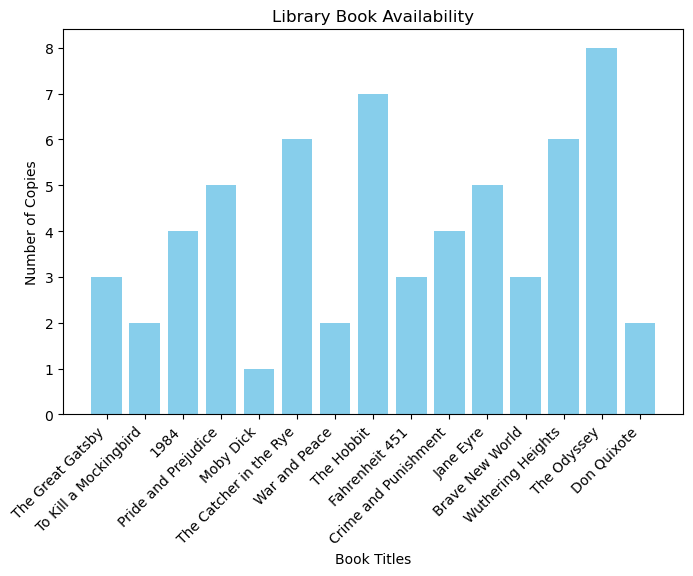

In [6]:
def visualize_books(manager):
    titles = [book.title for book in manager.books]
    copies = [book.copies for book in manager.books]

    plt.figure(figsize=(8, 5))
    plt.bar(titles, copies, color="skyblue")
    plt.title("Library Book Availability")
    plt.xlabel("Book Titles")
    plt.ylabel("Number of Copies")
    plt.xticks(rotation=45, ha='right')
    plt.show()

#Visualizing the current book availabilitty
visualize_books(library)


## Persistent Storage
Now, I’ll save the library data to a CSV file and load it back when needed.


In [7]:
#Saving books to a CSV file with error handling
def save_books(library_manager, filename="books.csv"):
    try:
        with open(filename, mode="w", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(["Title", "Author", "ISBN", "Copies"])
            for book in library_manager.books:
                writer.writerow([book.title, book.author, book.isbn, book.copies])
        print(f"Books successfully saved to {filename}.")
    except Exception as e:
        print(f"Error saving books to {filename}: {e}")

#Loading books from a CSV file with error handling
def load_books(library_manager, filename="books.csv"):
    try:
        with open(filename, mode="r") as file:
            reader = csv.DictReader(file)
            for row in reader:
                library_manager.add_book(row["Title"], row["Author"], row["ISBN"], int(row["Copies"]))
        print(f"Books successfully loaded from {filename}.")
    except FileNotFoundError:
        print(f"File {filename} not found.")
    except Exception as e:
        print(f"Error loading books from {filename}: {e}")
        

#Saving books to a CSV file
save_books(library, "books.csv")


Books successfully saved to books.csv.


**Testing error handling:**

In [8]:
#Attempting to load from a non-existent file
load_books(library, "nonexistent_file.csv")


File nonexistent_file.csv not found.



## Adding sorting algorithm

I will implement sorting algorithms to organize the library's book collection. 
- Sorting books alphabetically by title.
- Sorting by the number of available copies.

These algorithms will help demonstrate algorithm analysis and complexity.


In [9]:
#Sorting books alphabetically by title with Bubble Sort
def sort_books_by_title(books):
    """
    Sort the books list alphabetically by title using Bubble Sort.
    """
    n = len(books)
    for i in range(n):
        for j in range(0, n - i - 1):
            if books[j].title > books[j + 1].title:
                books[j], books[j + 1] = books[j + 1], books[j]

#Sorting books by the number of copies available with Selection Sort
def sort_books_by_copies(books):
    """
    Sort the books list by the number of copies available using Selection Sort.
    """
    n = len(books)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if books[j].copies < books[min_idx].copies:
                min_idx = j
        books[i], books[min_idx] = books[min_idx], books[i]

#Example: Books now
print("Books before sorting by title:")
library.show_books()

#Sorting by title
sort_books_by_title(library.books)
print("\nBooks after sorting by title:")
library.show_books()

#Sorting by copies
sort_books_by_copies(library.books)
print("\nBooks after sorting by number of copies:")
library.show_books()


Books before sorting by title:
Library Books:
The Great Gatsby by F. Scott Fitzgerald (ISBN: 9780743273565) - Copies available: 3
To Kill a Mockingbird by Harper Lee (ISBN: 9780061120084) - Copies available: 2
1984 by George Orwell (ISBN: 9780451524935) - Copies available: 4
Pride and Prejudice by Jane Austen (ISBN: 9780141040349) - Copies available: 5
Moby Dick by Herman Melville (ISBN: 9781503280786) - Copies available: 1
The Catcher in the Rye by J.D. Salinger (ISBN: 9780316769488) - Copies available: 6
War and Peace by Leo Tolstoy (ISBN: 9781400079988) - Copies available: 2
The Hobbit by J.R.R. Tolkien (ISBN: 9780547928227) - Copies available: 7
Fahrenheit 451 by Ray Bradbury (ISBN: 9781451673319) - Copies available: 3
Crime and Punishment by Fyodor Dostoevsky (ISBN: 9780486415871) - Copies available: 4
Jane Eyre by Charlotte Bronte (ISBN: 9780142437209) - Copies available: 5
Brave New World by Aldous Huxley (ISBN: 9780060850524) - Copies available: 3
Wuthering Heights by Emily Bro

## Searching Algorithms
Efficiently searching for books or users is an essential part of a library system. For example:
- Linear Search: Find a book by its title.
- Binary Search: Quickly locate a book in a sorted list.

We'll compare the efficiency of these approaches.


In [10]:
#Linear Search to find a book by its title
def linear_search_book(books, title):
    """
    Search for a book by title using Linear Search.
    """
    for book in books:
        if book.title.lower() == title.lower():
            return book
    return None

#Binary Search for finding a book by its title
def binary_search_book(books, title):
    """
    Search for a book by title using Binary Search.
    Requires the books list to be sorted alphabetically by title.
    """
    low, high = 0, len(books) - 1
    while low <= high:
        mid = (low + high) // 2
        if books[mid].title.lower() == title.lower():
            return books[mid]
        elif books[mid].title.lower() < title.lower():
            low = mid + 1
        else:
            high = mid - 1
    return None

#Example: Searching for books

#Seaching for:
search_title = "The Great Gatsby"

#Using Linear Search
print("\nSearching with Linear Search...")
book = linear_search_book(library.books, search_title)
if book:
    print(f"Found {book}")
else:
    print(f"Book '{search_title}' not found.")

#Sorting boosks first for Binary Search
sort_books_by_title(library.books)

#Using Binary Search
print("\nSearching with Binary Search...")
book = binary_search_book(library.books, search_title)
if book:
    print(f"Found: {book}")
else:
    print(f"Book '{search_title}' not found.")



Searching with Linear Search...
Found The Great Gatsby by F. Scott Fitzgerald (ISBN: 9780743273565) - Copies available: 3

Searching with Binary Search...
Found: The Great Gatsby by F. Scott Fitzgerald (ISBN: 9780743273565) - Copies available: 3


## Algorithm Analysis
I analyze the time complexity of the implemented algorithms:

1. **Sorting Algorithms**:
   - Bubble Sort: \(O(n^2)\) due to nested loops.
   - Selection Sort: \(O(n^2)\), as it also involves nested loops.

2. **Searching Algorithms**:
   - Linear Search: \(O(n)\), as it scans each item in the list.
   - Binary Search: \(O(\log n)\), as it divides the search space in half with each iteration (requires sorted data).

In practice, Binary Search is significantly faster for large datasets, but it requires the data to be sorted first.


## Demonstration
Now applying these algorithms to the library's collection and compare their outputs.


In [11]:
#Showing the sorting
print("Sorting books by title...")
sort_books_by_title(library.books)
library.show_books()

#Showing the searching
print("\nSearching for '1984'...")
book = binary_search_book(library.books, "1984")
if book:
    print(f"Found: {book}")
else:
    print("Book not found.")


Sorting books by title...
Library Books:
1984 by George Orwell (ISBN: 9780451524935) - Copies available: 4
Brave New World by Aldous Huxley (ISBN: 9780060850524) - Copies available: 3
Crime and Punishment by Fyodor Dostoevsky (ISBN: 9780486415871) - Copies available: 4
Don Quixote by Miguel de Cervantes (ISBN: 9780060934347) - Copies available: 2
Fahrenheit 451 by Ray Bradbury (ISBN: 9781451673319) - Copies available: 3
Jane Eyre by Charlotte Bronte (ISBN: 9780142437209) - Copies available: 5
Moby Dick by Herman Melville (ISBN: 9781503280786) - Copies available: 1
Pride and Prejudice by Jane Austen (ISBN: 9780141040349) - Copies available: 5
The Catcher in the Rye by J.D. Salinger (ISBN: 9780316769488) - Copies available: 6
The Great Gatsby by F. Scott Fitzgerald (ISBN: 9780743273565) - Copies available: 3
The Hobbit by J.R.R. Tolkien (ISBN: 9780547928227) - Copies available: 7
The Odyssey by Homer (ISBN: 9780140268867) - Copies available: 8
To Kill a Mockingbird by Harper Lee (ISBN: 9

In [12]:
#Searching demonstration
print("\nSearching for '1984'...")
book = binary_search_book(library.books, "1984")
if book:
    print(f"Found: {book}")
else:
    print("Book not found.")


Searching for '1984'...
Found: 1984 by George Orwell (ISBN: 9780451524935) - Copies available: 4


## Visualizing Algorithm Performance
To compare algorithm efficiency, I will measure execution times for the Linear Search and the Binary Search over some increasing data sizes.


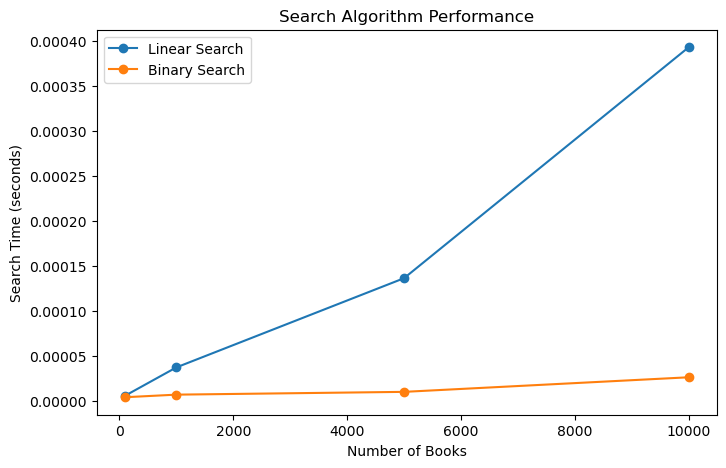

In [13]:
#Generating a long list of random book titles for testing
def generate_books(n):
    return [Book(f"Book{i}", "Author", f"ISBN{i}", random.randint(1, 10)) for i in range(n)]

#Measuring time for the Linear Search and the Binary Search
def compare_search_algorithms(n):
    books = generate_books(n)
    sort_books_by_title(books)  #Sorting for Binary Search
    target_title = "Book" + str(n // 2)  #Search for a middle book

    #Linear Search
    start = time.time()
    linear_search_book(books, target_title)
    linear_time = time.time() - start

    #Binary Search
    start = time.time()
    binary_search_book(books, target_title)
    binary_time = time.time() - start

    return linear_time, binary_time

#Comparing performance for increasing dataset sizes
sizes = [100, 1000, 5000, 10000]
times = [compare_search_algorithms(size) for size in sizes]

#Plotting the results
linear_times, binary_times = zip(*times)
plt.figure(figsize=(8, 5))
plt.plot(sizes, linear_times, label="Linear Search", marker="o")
plt.plot(sizes, binary_times, label="Binary Search", marker="o")
plt.xlabel("Number of Books")
plt.ylabel("Search Time (seconds)")
plt.title("Search Algorithm Performance")
plt.legend()
plt.show()


**It can be seen that the Binary Search is more efficient in increasing datasets.**